<div class="alert alert-block alert-info" style="margin-top: 20px; background-color:#DCDCDC">
<strong>Classification</strong> Find what class a sample belongs to.
</div>

# Artificial Neural Network Classification

## Overview

- [Description](#Description)  
- [EXAMPLE - Decision Boundaries Visualization](#EXAMPLE---Decision-Boundaries-Visualization)

## Description

**Artificial Neural Network (ANN)** is a neural network that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where m is the number of dimensions for input and o is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers (when there are several hidden layers it can be considered as Deep Learning). Figure 1 shows a one hidden layer ANN with scalar output. 

<img src="images/multilayerperceptron_network.png" width="40%">

The leftmost layer, known as the input layer, consists of a set of neurons $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features. Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the hyperbolic tan function $tanh(z)$. The output layer receives the values from the last hidden layer and transforms them into output values.

The **advantages** of Artifictial Neural Networks (ANN) are:

- Capability to learn non-linear models.

The **disadvantages** of Artifictial Neural Networks (ANN) include:

- ANN with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
- ANN requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
- ANN is sensitive to feature scaling.

See [Multi-Layer Perceptron Classification](./10 Multi-Layer Perceptron Classification.ipynb) for a brief introduction of **Neural Networks**.  
See [Introduction to Keras](../06 Deep Learning/00 Introduction/00 Introduction to Keras.ipynb) for an introduction to **Keras** and deep learning pakages like **TensorFlow** and **Theano**.

In [1]:
# load libraries and set plot parameters
import numpy as np
import pandas as pd
# import PrettyTable as pt

import matplotlib.pyplot as plt
%matplotlib inline

# plots configuration
# plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 11

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dataset = load_iris()
print(dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['class'] = pd.Series(dataset.target, name='class')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [6]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler(with_mean=True, with_std=True)
sd.fit(X_train)

X_train_std = sd.transform(X_train)
X_test_std = sd.transform(X_test)

In [7]:
# load keras classes
from keras.models import Sequential
from keras.layers import Dense, Dropout

# since it's a multiclass problem
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)

Using TensorFlow backend.


In [8]:
# building a model like the MLP model built with scikit-learn package
ann = Sequential()
ann.add(Dense(units=3, 
              input_dim=4, 
              kernel_initializer='uniform',
              activation='relu'))
ann.add(Dense(units=3,
              kernel_initializer='uniform',
              activation='softmax'))
ann.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])


hist = ann.fit(x=X_train_std, y=y_train, batch_size=32, epochs=1000, verbose=0)

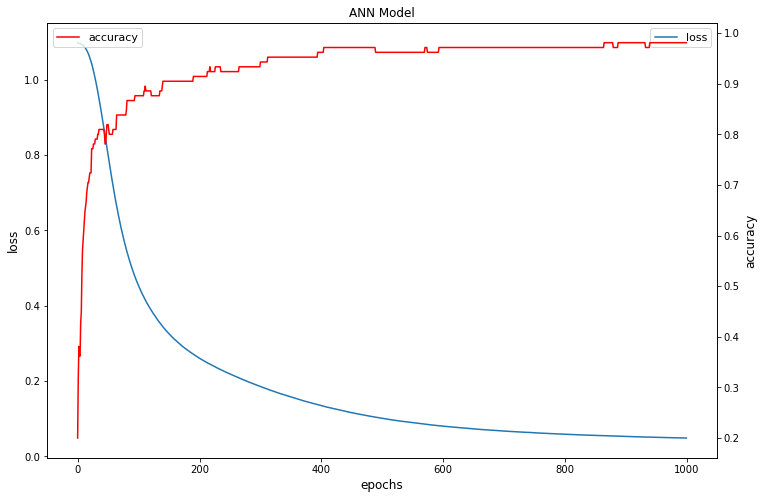

In [9]:
fig, ax1 = plt.subplots()

ax1.plot(hist.history['loss'], label='loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.set_title('ANN Model')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(hist.history['acc'], c='r', label='accuracy')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

In [10]:
ann.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [11]:
y_pred = ann.predict_classes(X_test_std, verbose=0)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test,y_pred=y_pred)

print('Accuracy: {0}'.format(accuracy))
print('Number of milabeled points: {0}'.format((y_test!=y_pred).sum()))

Accuracy: 0.9333333333333333
Number of milabeled points: 3


## EXAMPLE - Decision Boundaries Visualization

For visualization purposes we will choose two features: petal widh and petal length

In [12]:
X = df.drop(labels=['class','sepal length (cm)', 'sepal width (cm)'], axis=1)
y = df['class']
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Accuracy: 0.9111111111111111
Number of mislabeled points: 4


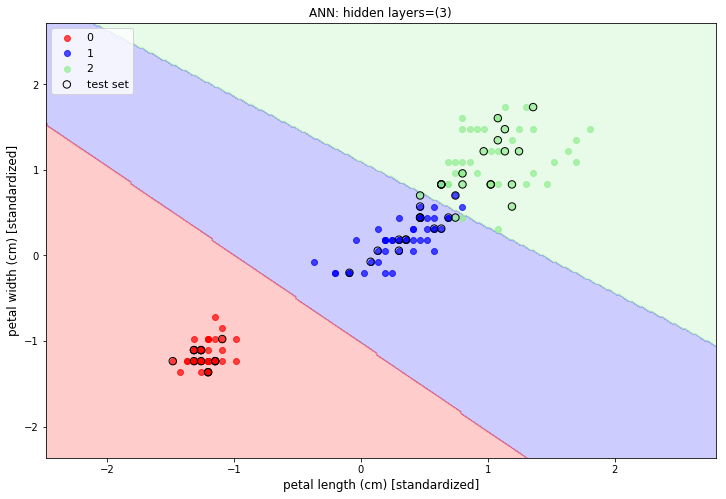

In [13]:
from modules import plot_decision_regions_ann

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
sc = StandardScaler(with_mean=True, with_std=True)
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

y_train_class = np_utils.to_categorical(y_train)

ann = Sequential()
ann.add(Dense(units=3, 
              input_dim=2, 
              kernel_initializer='uniform',
              activation='relu'))
ann.add(Dense(units=3,
              kernel_initializer='uniform',
              activation='softmax'))
ann.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

ann.fit(x=X_train_std, y=y_train_class, batch_size=32, epochs=1000, verbose=0)

plot_decision_regions_ann(X_train_std, X_test_std, y_train, y_test, classifier=ann, test_marker=True)
plt.title('ANN: hidden layers=(3)')
plt.xlabel('petal length (cm) [standardized]')
plt.ylabel('petal width (cm) [standardized]')